# HW 0 - Intro to Pandas
Credit: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [6]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.670903,-0.343768,0.488201,-0.564606
2013-01-02,-0.987669,2.074911,0.124786,-1.369955
2013-01-03,-0.513408,-0.236211,-1.468725,0.550285
2013-01-04,-0.586042,1.047019,1.517574,-0.882505
2013-01-05,0.400232,0.420631,0.189479,-0.415764
2013-01-06,-0.512609,-0.528937,0.454646,-0.809055


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [15]:
df.head(1)

,A,B,C,D
2013-01-01,0.670903,-0.343768,0.488201,-0.564606


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.586042,1.047019,1.517574,-0.882505
2013-01-05,0.400232,0.420631,0.189479,-0.415764
2013-01-06,-0.512609,-0.528937,0.454646,-0.809055


Display the index, columns:

In [16]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [18]:
df.values

array([[ 0.67090329, -0.34376767,  0.48820112, -0.56460577],
       [-0.9876693 ,  2.07491127,  0.12478625, -1.36995532],
       [-0.51340767, -0.23621064, -1.46872517,  0.55028471],
       [-0.58604212,  1.04701879,  1.51757412, -0.88250488],
       [ 0.40023157,  0.420631  ,  0.18947893, -0.41576354],
       [-0.51260851, -0.52893676,  0.4546458 , -0.80905499]])

In [19]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.254765,0.405608,0.217660,-0.581933
std,0.642830,1.004497,0.966690,0.643853
min,-0.987669,-0.528937,-1.468725,-1.369955
25%,-0.567884,-0.316878,0.140959,-0.864142
50%,-0.513008,0.092210,0.322062,-0.686830
75%,0.172022,0.890422,0.479812,-0.452974
max,0.670903,2.074911,1.517574,0.550285


Transposing your data:

In [21]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.670903,-0.987669,-0.513408,-0.586042,0.400232,-0.512609
B,-0.343768,2.074911,-0.236211,1.047019,0.420631,-0.528937
C,0.488201,0.124786,-1.468725,1.517574,0.189479,0.454646
D,-0.564606,-1.369955,0.550285,-0.882505,-0.415764,-0.809055


Sorting by an axis:

In [22]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.564606,0.488201,-0.343768,0.670903
2013-01-02,-1.369955,0.124786,2.074911,-0.987669
2013-01-03,0.550285,-1.468725,-0.236211,-0.513408
2013-01-04,-0.882505,1.517574,1.047019,-0.586042
2013-01-05,-0.415764,0.189479,0.420631,0.400232
2013-01-06,-0.809055,0.454646,-0.528937,-0.512609


Sorting by values:

In [23]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-0.512609,-0.528937,0.454646,-0.809055
2013-01-01,0.670903,-0.343768,0.488201,-0.564606
2013-01-03,-0.513408,-0.236211,-1.468725,0.550285
2013-01-05,0.400232,0.420631,0.189479,-0.415764
2013-01-04,-0.586042,1.047019,1.517574,-0.882505
2013-01-02,-0.987669,2.074911,0.124786,-1.369955


## Selection

### Getting 

Selecting a single column, which yields a Series, equivalent to df.A:

In [24]:
df['A']

2013-01-01    0.670903
2013-01-02   -0.987669
2013-01-03   -0.513408
2013-01-04   -0.586042
2013-01-05    0.400232
2013-01-06   -0.512609
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [26]:
df[0:3]

,A,B,C,D
2013-01-01,0.670903,-0.343768,0.488201,-0.564606
2013-01-02,-0.987669,2.074911,0.124786,-1.369955
2013-01-03,-0.513408,-0.236211,-1.468725,0.550285


In [27]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.987669,2.074911,0.124786,-1.369955
2013-01-03,-0.513408,-0.236211,-1.468725,0.550285
2013-01-04,-0.586042,1.047019,1.517574,-0.882505


### Selection by label

For getting a cross section using a label:

In [28]:
df.loc[dates[0]]

A    0.670903
B   -0.343768
C    0.488201
D   -0.564606
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [29]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.670903,-0.343768
2013-01-02,-0.987669,2.074911
2013-01-03,-0.513408,-0.236211
2013-01-04,-0.586042,1.047019
2013-01-05,0.400232,0.420631
2013-01-06,-0.512609,-0.528937


Showing label slicing, both endpoints are included:

In [30]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.987669,2.074911
2013-01-03,-0.513408,-0.236211
2013-01-04,-0.586042,1.047019


Reduction in the dimensions of the returned object:

In [31]:
df.loc['20130102', ['A', 'B']]

A   -0.987669
B    2.074911
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [32]:
df.loc[dates[0], 'A']

0.6709032929894319

For getting fast access to a scalar (equivalent to the prior method):

In [33]:
df.at[dates[0], 'A']

0.6709032929894319

### Selection by position

Select via the position of the passed integers:

In [34]:
df.iloc[3]

A   -0.586042
B    1.047019
C    1.517574
D   -0.882505
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [35]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.586042,1.047019
2013-01-05,0.400232,0.420631


By lists of integer position locations, similar to the numpy/python style:

In [36]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.987669,0.124786
2013-01-03,-0.513408,-1.468725
2013-01-05,0.400232,0.189479


For slicing rows explicitly:

In [37]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.987669,2.074911,0.124786,-1.369955
2013-01-03,-0.513408,-0.236211,-1.468725,0.550285


For slicing columns explicitly:

In [38]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.343768,0.488201
2013-01-02,2.074911,0.124786
2013-01-03,-0.236211,-1.468725
2013-01-04,1.047019,1.517574
2013-01-05,0.420631,0.189479
2013-01-06,-0.528937,0.454646


For getting a value explicitly:

In [39]:
df.iloc[1, 1]

2.0749112652869517

For getting fast access to a scalar (equivalent to the prior method):

In [40]:
df.iat[1, 1]

2.0749112652869517

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [41]:
df[df > 0]

,A,B,C,D
2013-01-01,0.670903,NaN,0.488201,NaN
2013-01-02,NaN,2.074911,0.124786,NaN
2013-01-03,NaN,NaN,NaN,0.550285
2013-01-04,NaN,1.047019,1.517574,NaN
2013-01-05,0.400232,0.420631,0.189479,NaN
2013-01-06,NaN,NaN,0.454646,NaN


Using the isin() method for filtering:

In [42]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.670903,-0.343768,0.488201,-0.564606,one
2013-01-02,-0.987669,2.074911,0.124786,-1.369955,one
2013-01-03,-0.513408,-0.236211,-1.468725,0.550285,two
2013-01-04,-0.586042,1.047019,1.517574,-0.882505,three
2013-01-05,0.400232,0.420631,0.189479,-0.415764,four
2013-01-06,-0.512609,-0.528937,0.454646,-0.809055,three


In [43]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.513408,-0.236211,-1.468725,0.550285,two
2013-01-05,0.400232,0.420631,0.189479,-0.415764,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label:

In [46]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [47]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [48]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.488201,5,NaN
2013-01-02,-0.987669,2.074911,0.124786,5,1.0
2013-01-03,-0.513408,-0.236211,-1.468725,5,2.0
2013-01-04,-0.586042,1.047019,1.517574,5,3.0
2013-01-05,0.400232,0.420631,0.189479,5,4.0
2013-01-06,-0.512609,-0.528937,0.454646,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.488201,-5,NaN
2013-01-02,-0.987669,-2.074911,-0.124786,-5,-1.0
2013-01-03,-0.513408,-0.236211,-1.468725,-5,-2.0
2013-01-04,-0.586042,-1.047019,-1.517574,-5,-3.0
2013-01-05,-0.400232,-0.420631,-0.189479,-5,-4.0
2013-01-06,-0.512609,-0.528937,-0.454646,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.488201,5,NaN,1.0
2013-01-02,-0.987669,2.074911,0.124786,5,1.0,1.0
2013-01-03,-0.513408,-0.236211,-1.468725,5,2.0,NaN
2013-01-04,-0.586042,1.047019,1.517574,5,3.0,NaN


** To drop any rows that have missing data. **

In [52]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-0.987669,2.074911,0.124786,5,1.0,1.0


Filling missing data.

In [53]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.488201,5,5.0,1.0
2013-01-02,-0.987669,2.074911,0.124786,5,1.0,1.0
2013-01-03,-0.513408,-0.236211,-1.468725,5,2.0,5.0
2013-01-04,-0.586042,1.047019,1.517574,5,3.0,5.0


To get the boolean mask where values are nan

In [54]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [55]:
df.mean()

A   -0.366583
B    0.462902
C    0.217660
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [56]:
df.mean(1)

2013-01-01    1.372050
2013-01-02    1.442406
2013-01-03    0.956331
2013-01-04    1.995710
2013-01-05    2.002068
2013-01-06    1.882620
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [57]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [58]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.513408,-1.236211,-2.468725,4.0,1.0
2013-01-04,-3.586042,-1.952981,-1.482426,2.0,0.0
2013-01-05,-4.599768,-4.579369,-4.810521,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 

Applying functions to the data:

In [59]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.488201,5,NaN
2013-01-02,-0.987669,2.074911,0.612987,10,1.0
2013-01-03,-1.501077,1.838701,-0.855738,15,3.0
2013-01-04,-2.087119,2.885719,0.661836,20,6.0
2013-01-05,-1.686888,3.306350,0.851315,25,10.0
2013-01-06,-2.199496,2.777414,1.305961,30,15.0


### Histrogramming

In [60]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    5
2    1
3    1
4    2
5    5
6    4
7    2
8    5
9    4
dtype: int64

In [61]:
s.value_counts()

1    3
5    3
2    2
4    2
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [62]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [63]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [64]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.919038,0.188481,-1.472124,-0.967573
1,-0.901344,-0.795507,-0.862648,0.873044
2,-0.288619,-0.936552,-0.980578,-0.381421
3,-0.978422,-0.588406,-0.198352,0.660898
4,-0.086772,-0.586498,-0.058580,-1.254650
5,-0.031875,-0.023177,-1.018179,-0.116752
6,0.263091,-1.314597,-0.237374,0.306795
7,-0.316743,-0.286571,0.945800,0.956495
8,-1.181670,-1.788931,0.646192,1.160720
9,-1.428824,1.732236,-0.041617,1.346104


In [65]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.919038,0.188481,-1.472124,-0.967573
1,-0.901344,-0.795507,-0.862648,0.873044
2,-0.288619,-0.936552,-0.980578,-0.381421
7,-0.316743,-0.286571,0.945800,0.956495
8,-1.181670,-1.788931,0.646192,1.160720
9,-1.428824,1.732236,-0.041617,1.346104


### Join

SQL style merges

In [66]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [67]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. 

In [68]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.579345,0.311083,2.069299,0.969852
1,-1.164420,-2.356909,0.299752,-0.344330
2,0.242509,1.417897,-0.287952,0.265160
3,-2.052399,-1.045717,0.201892,0.615371
4,0.874860,0.497006,1.008244,0.741585
5,0.970387,-0.173554,-0.955547,-0.034969
6,-0.234780,-1.284873,-0.031430,0.795413
7,-0.615022,0.899193,-0.567428,0.791499


In [69]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.579345,0.311083,2.069299,0.969852
1,-1.164420,-2.356909,0.299752,-0.344330
2,0.242509,1.417897,-0.287952,0.265160
3,-2.052399,-1.045717,0.201892,0.615371
4,0.874860,0.497006,1.008244,0.741585
5,0.970387,-0.173554,-0.955547,-0.034969
6,-0.234780,-1.284873,-0.031430,0.795413
7,-0.615022,0.899193,-0.567428,0.791499
8,-2.052399,-1.045717,0.201892,0.615371


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [70]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.276036,-1.728665
1,bar,one,-0.093853,-0.279665
2,foo,two,-0.531812,-1.000499
3,bar,three,-0.118459,0.881188
4,foo,two,1.103210,0.178830
5,bar,two,-1.573844,0.118255
6,foo,one,0.599320,-1.221218
7,foo,three,-0.648038,1.378675


Grouping and then applying the sum() function to the resulting groups.

In [71]:
df.groupby('A').sum()

,C,D
A,,
bar,-1.786157,0.719777
foo,0.798716,-2.392878


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [72]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.093853 -0.279665
    three -0.118459  0.881188
    two   -1.573844  0.118255
foo one    0.875356 -2.949884
    three -0.648038  1.378675
    two    0.571398 -0.821669

## Plotting

<AxesSubplot:>

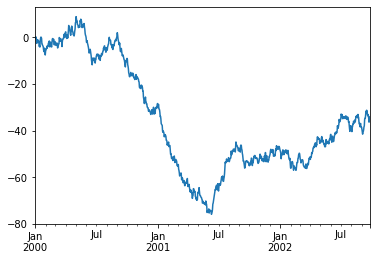

In [73]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

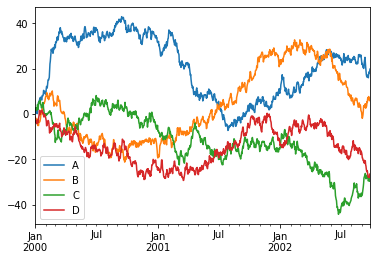

In [74]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [75]:
df.to_csv('foo.csv')

In [76]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.528942,-1.591407,2.332516,-1.335132
1,2000-01-02,1.406594,-1.958017,2.633187,-2.968544
2,2000-01-03,1.365840,-1.918711,1.657650,-3.799204
3,2000-01-04,1.035569,-2.282468,2.677480,-3.007779
4,2000-01-05,0.587809,-3.056690,2.304689,-3.128937
